In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
from SABR import SABR
from get_data import Parser

In [2]:
btc_parcer = Parser('btc_usd')

In [3]:
df = btc_parcer.get_live_data(1)

In [4]:
df

,currency,type,days until expiration,strike,mark_price,iv,underlying_price
0,BTC,call,226,60000,0.0487,1.1040,16996.99
1,BTC,put,44,35000,1.0861,1.0108,16996.99
2,BTC,call,72,23000,0.0991,1.1594,16996.99
3,BTC,put,2,23000,0.3564,1.3182,16996.99
4,BTC,put,1,16750,0.0172,0.8739,16996.99
...,...,...,...,...,...,...,...
19,BTC,put,0,19000,0.1171,1.2739,17023.82
20,BTC,call,0,17500,0.0043,0.8363,17023.82
21,BTC,call,0,15000,0.1189,1.5004,17023.82
0,BTC,put,226,10000,0.2663,1.9725,17023.86


In [6]:
maturities = np.sort(np.unique(df['days until expiration'].values))
x = []
y = []
call_prices = []
for maturity in maturities:
    indicies = (df['days until expiration'] == maturity) & (df['type'] == 'call')
    x.append(torch.Tensor(np.array([df['strike'][indicies].values,df['underlying_price'][indicies].values,
                df['days until expiration'][indicies].values/365])))
    y.append(torch.Tensor(df['iv'][indicies].values))
    call_prices.append((df['mark_price'][indicies].values)*(df['underlying_price'][indicies].values))

In [8]:
sabr = SABR()
f = sabr.sigma_SABR

In [11]:
params = np.load('params.npy', allow_pickle = True)

In [12]:
params

array([tensor([106.3462,  18.7061,  -0.2635]),
       tensor([102.7507,  12.9792,  -0.2617]),
       tensor([96.3574,  9.0095, -0.2658]),
       tensor([84.9091,  4.8332,  0.1160]),
       tensor([2.1929e+02, 6.7668e+00, 1.2401e-01]),
       tensor([458.0815,  12.7852,  -0.8659]),
       tensor([464.5633,   6.7986,  -0.8363]),
       tensor([171.3891,   8.0688,  -0.8388]),
       tensor([123.5095,   1.6204,  -0.1449]),
       tensor([234.4482,   8.1954,  -0.7748])], dtype=object)

In [14]:
labels = [str(maturity)+" days until expiration" for maturity in maturities]

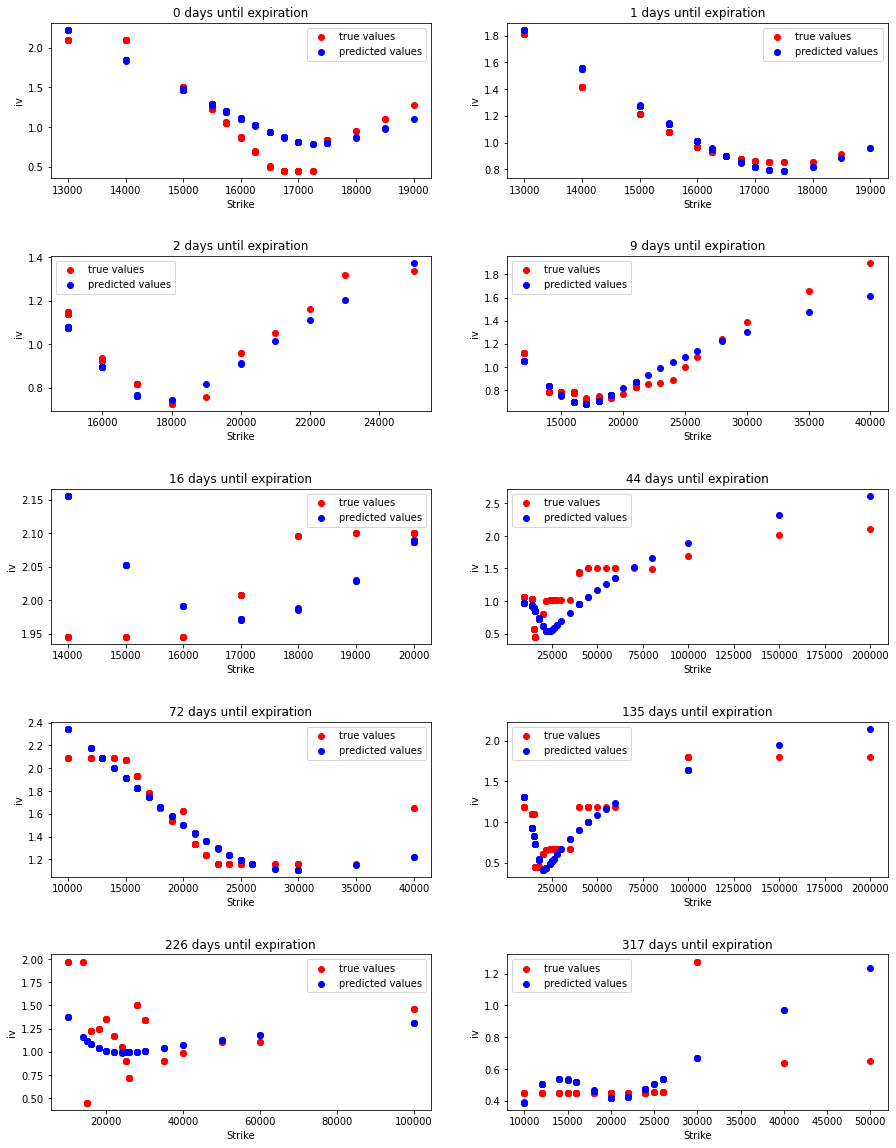

In [15]:
%matplotlib inline
ax = [0]
fig = plt.figure(figsize = (15,20)) 
fig.tight_layout(pad=10.0)

for i in range(len(maturities)):
# create figure window

    gs = gridspec.GridSpec(5, 2)
    gs.update(wspace = 0.2, hspace = 0.5)
# Creates grid 'gs' of a rows and b columns 

    ax[i] = plt.subplot(gs[(i)//2, (i)%2])
# Adds subplot 'ax' in grid 'gs' at position [x,y]


    ax[i].set_ylabel('iv') 
    ax[i].set_xlabel('Strike') 

    ax[i].scatter(x[i][0], y[i], color = 'r', label = 'true values')
    ax[i].scatter(x[i][0], f(params[i], x[i]), color = 'b', label = 'predicted values')
    ax[i].title.set_text(labels[i])
    ax[i].legend()
    fig.add_subplot(ax[i]) #add 'ax' to figure
    ax.append([0])

   


In [16]:
fit_call_prices = []
for i in range(len(maturities)):
    sabr.set_params(params[i])
    fit_call_prices.append(sabr.bs_call(x[i]))

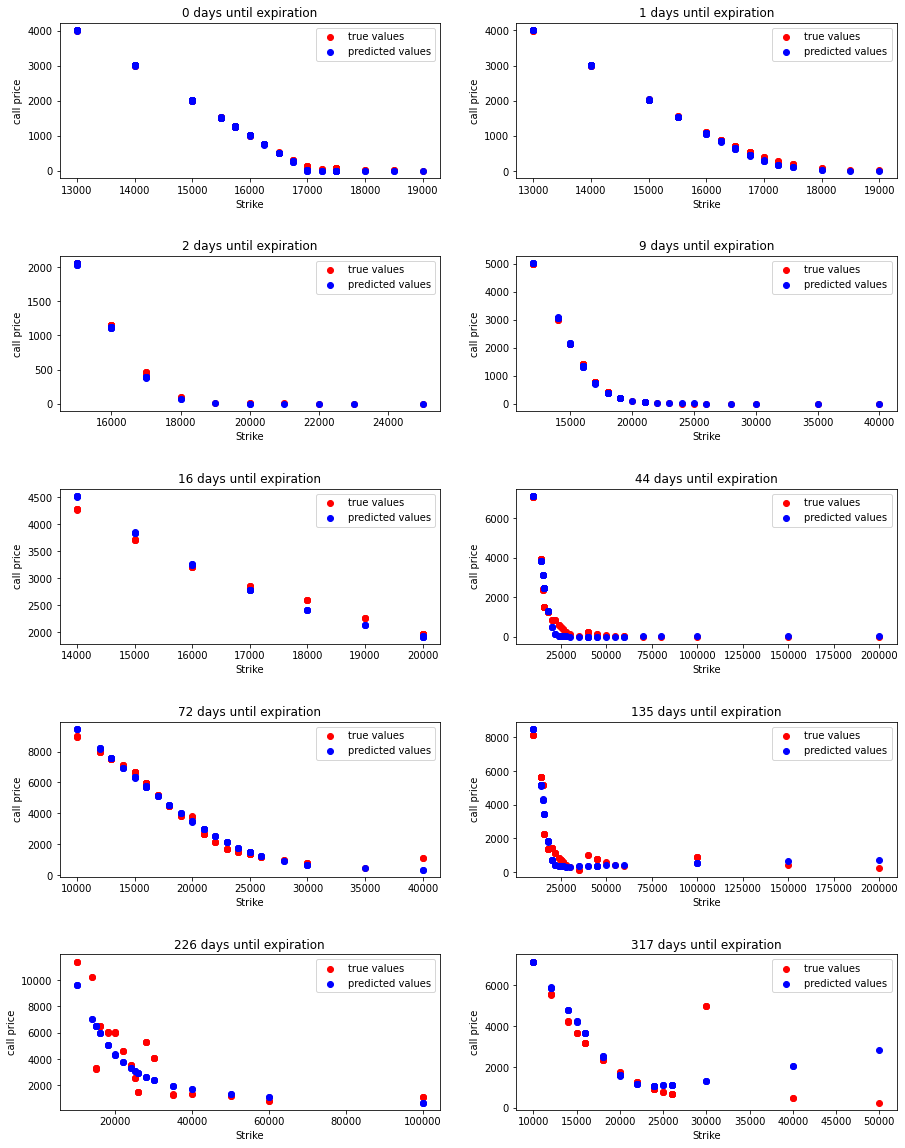

In [17]:
%matplotlib inline
ax = [0]
fig = plt.figure(figsize = (15,20)) 
fig.tight_layout(pad=10.0)

for i in range(len(maturities)):
# create figure window

    gs = gridspec.GridSpec(5, 2)
    gs.update(wspace = 0.2, hspace = 0.5)
# Creates grid 'gs' of a rows and b columns 

    ax[i] = plt.subplot(gs[(i)//2, (i)%2])
# Adds subplot 'ax' in grid 'gs' at position [x,y]


    ax[i].set_ylabel('call price') 
    ax[i].set_xlabel('Strike') 

    ax[i].scatter(x[i][0], call_prices[i], color = 'r', label = 'true values')
    ax[i].scatter(x[i][0], fit_call_prices[i], color = 'b', label = 'predicted values')
    ax[i].title.set_text(labels[i])
    ax[i].legend()
    fig.add_subplot(ax[i]) #add 'ax' to figure
    ax.append([0])